In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

In [3]:
train_df_model = train_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type','Outlet_Establishment_Year'], axis = 1)
test_df_model = test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Type','Outlet_Establishment_Year'], axis = 1)

In [4]:
y =train_df_model['Item_Outlet_Sales']
x = train_df_model.drop(['Item_Outlet_Sales'], axis = 1)
x_test = test_df_model

In [5]:
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (8523, 25)
Shape of the y : (8523,)
Shape of the x Test : (5681, 25)


In [6]:
cols = [ 
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Years'
]
x[cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years
0,9.300,0.016047,249.8092,14
1,5.920,0.019278,48.2692,4
2,17.500,0.016760,141.6180,14
3,19.200,0.000000,182.0950,15
4,8.930,0.000000,53.8614,26
...,...,...,...,...
8518,6.865,0.056783,214.5218,26
8519,8.380,0.046982,108.1570,11
8520,10.600,0.035186,85.1224,9
8521,7.210,0.145221,103.1332,4


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[cols]  =  sc.fit_transform(x[cols])
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.769246,-0.970732,1.747454,-0.139541,0.931078,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.496813,-0.908111,-1.489023,-1.334103,0.933420,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,0.995858,-0.956917,0.010040,-0.139541,0.960069,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.361794,-1.281758,0.660050,-0.020085,0.000000,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.848890,-1.281758,-1.399220,1.293934,0.000000,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [9]:
# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (6818, 25)
Shape of the y Train : (6818,)
Shape of the x Valid : (1705, 25)
Shape of the y Valid : (1705,)
Shape of the x Test : (5681, 25)


# XGBOOST Regressor

In [10]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [13]:
import xgboost
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(x,y)

#Predicting the Test set results
y_pred_xgb = xgb.predict(x_train)
score = r2_score(y_train,y_pred_xgb)
print("Score of Training:",score)
print("RMSE : ",np.sqrt(mean_squared_error(y_train,y_pred_xgb)))

y_test_pred_xgb = xgb.predict(x_valid)
score = r2_score(y_valid,y_test_pred_xgb)
print("Score of Testing:",score)
print("RMSE :",np.sqrt(mean_squared_error(y_valid,y_test_pred_xgb)))

Score of Training: 0.9987434753705942
RMSE :  60.448181887580404
Score of Testing: 0.9985335236168434
RMSE : 65.51465686710057


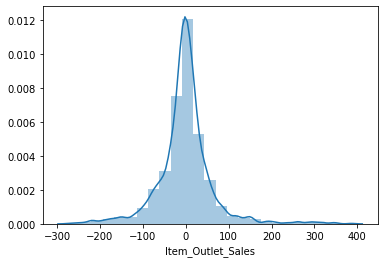

In [14]:
sns.distplot(y_valid-y_test_pred_xgb, bins = 25)